# Lab 1 (of 5): Machine Learning Fundamentals

In this lab you will practice a fundamental part of machine learning: probability. You will also practice programming in python, which is another kind of "fun". Complete all parts marked with a "*" at least. You can do more parts, of course, because in the end that will help you on your project!


We first return to that rather simple game we discusssed in Lecture 2, which costs 1 SEK to roll one fair die and flip one fair coin. And if the player rolls a "6" and flips a "heads", they win 10 SEK!

# 1.1*
Assuming a player starts with 100 SEK, find the probability distribution of the player's money after playing this game 600 times. In other words, simulate a player playing this game 600 times, starting with 100 SEK, and compute their money at the end (or the amount they owe if they go in the negative). Do this one million times. Finally, create a histogram of the winnings from these one million times. It should look something like the below. (Try different numbers of histogram bins to make a smoother looking plot.)

<figure>
<center>
<img src='https://drive.google.com/uc?id=1fHuN4P88l4rYwMRpTNqJQFXOXd3vzeIU' width="700"/>
<figcaption></figcaption></center>
</figure>

Hint: There's a computationally inefficient way to do this, and a computationally *efficient* way. Do the latter.


Theoretical probability of winning = 0.08333333333333333


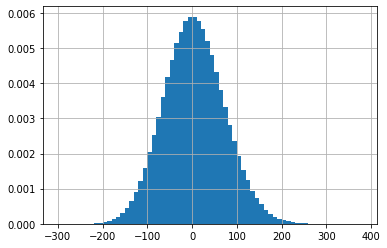

In [6]:
# add your code below
import numpy as np # because we need random number generation
import matplotlib.pyplot as plt
print('Theoretical probability of winning =',1.0/12) # theoretical value
Plays = 600 
money_list = []

# more computationally efficient approach:
for i in range(1000000):
  flip = np.random.randint(1,3,Plays)
  roll = np.random.randint(1,7,Plays)
  wins = np.sum( (flip == 1) & (roll == 6) )
  money = 100 - Plays + (wins * 10)
  money_list.append(money)

values, bins, patches = plt.hist(money_list, 68, density=True)
plt.grid()
plt.show()

# 1.2*

Find the mean and variance of the winnings, and plot a Gaussian distribution over your histogram with those parameters. Remember, a Gaussian distribution with mean $\mu$ and variance $\sigma^2$ is given by:

\begin{equation}
f(x)= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/2\sigma^2}
\end{equation}

<function matplotlib.pyplot.show>

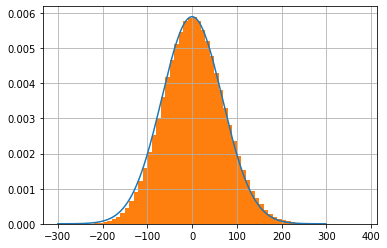

In [7]:
# see numpy.mean and numpy.var
# add your code below
my = np.mean(money_list)
sigma = np.var(money_list)
x = np.arange(-300,300)
f = (1 / (np.sqrt(2*np.pi*sigma))) * np.exp(-((x-my)**2)/(2*sigma))

plt.grid()
plt.plot(x,f)
plt.hist(money_list, 68, density=True)
plt.show


# 1.3*

Questions: How well does the Gaussian distribution fit the distribution of winnings? Why is it centered around 0? (If it's not centered around 0, you have done something wrong!)

**Answer**:It fit very well because of the central limit theorem. It centered around 0 because the game is pretty fair and the most likley outcome is 0. 

# 1.4*

Using your histogram, compute the probability that someone playing this game 600 times will end up with more than 100 SEK by the end (and certainly a little crazy in the head). Hint: You will need to compute an area under your histogram, which means you will have to take into account the thickness of the histogram bars. 

In [12]:
# see numpy.sum
# add your code below
count = 0
for i in bins: #calculating the index for the value 100
  count += 1
  if i >= 100:
    break

width = abs(bins[0]) - abs(bins[1])

probability = np.sum(values[count:]) * width
print("The probability is:", probability)

The probability is: 0.063281


# 1.5*

Now consider that you create a new game in which a player rolls one fair die, flips one fair coin, and draws one card from a fair deck of 52 playing cards. They will win if the coin shows "heads", the die roll is "odd", and the drawn card is an "ace". Compute the probability of winning, and using that answer, determine the maximum payout (in whole SEK) if the cost of playing is 1 SEK, and you don't want to lose money most of the time?

**Answer**: 1/2 * 1/2 * 1/13 = 0,019 
so 1 / 0,019 = 52kr


# 1.6*

Assume ten players want to play your new game, 1000 times, with the maximum payout you found above. Track your income from each of these players and plot them as time proceeds.

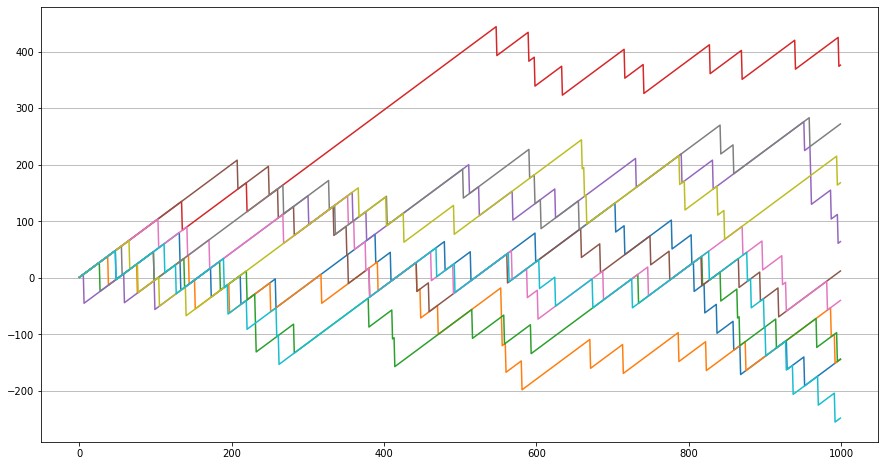

In [36]:
# add your code below
import numpy as np # because we need random number generation
import matplotlib.pyplot as plt

# more computationally efficient approach:
def playthought(plays):
  money_list = []
  money = 0
  for a in range(plays):
    
    flip = np.random.randint(1, 3)
    roll = np.random.randint(1, 7)
    card = np.random.randint(1, 14)

    if flip == 1 and roll % 2 == 1 and card == 13:
      money += -51
    else:
      money += 1
    money_list.append(money)

  return money_list

plt.figure(figsize=(15,8))

for a in range(10):
  
  plt.plot(playthought(1000))


plt.grid(axis='y')
plt.show()

# 1.7* 

Question: In how many cases did you make money?

**Answer**: 5

# 1.8 

Look at this funny tweet: https://twitter.com/bayesiangirl/status/1214753289528434688

![alt text](https://drive.google.com/uc?id=1pusngvN5Rjg5iqzaCQqpl_53VuVe6CJk)

Prove it. (The first part, i.e., that at least one coin of 1024 fair coins each tossed 10 times will come up all heads with probability 0.63.)

In [ ]:
# add your code below
Bin (1024, (1/2)^10)

1 - Px(0) = 1 - (1 - (1/2)^10)^1024 = 0,63